In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model(
    "/content/drive/My Drive/cnn_project/driver_behavior_cnn.h5"
)

print("Model loaded successfully")


Model loaded successfully


In [ ]:
class_names = [
    "Smoking/Drinking/Drowsy",
    "safe_driving",
    "talking_phone",
    "texting_phone",
    "seat_belt"
]

IMG_SIZE = 128


In [ ]:
import numpy as np
import cv2

def preprocess_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise ValueError("Image not found")

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # (1, 128, 128, 3)

    return img


In [ ]:
image_path = "/content/drive/My Drive/cnn_project/test6.jpg"

img = preprocess_image(image_path)

prediction = model.predict(img)

class_id = prediction.argmax()
confidence = prediction.max()

print("Predicted Class:", class_names[class_id])
print("Confidence:", confidence)


ValueError: Image not found

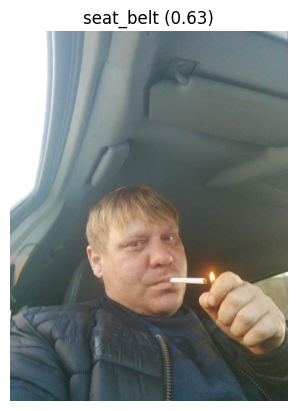

In [ ]:
import matplotlib.pyplot as plt

img_show = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

plt.imshow(img_show)
plt.title(f"{class_names[class_id]} ({confidence:.2f})")
plt.axis("off")
plt.show()


In [ ]:
image_path = "/content/drive/My Drive/cnn_project/test_phone.jpg"

img = preprocess_image(image_path)

prediction = model.predict(img)

class_id = prediction.argmax()
confidence = prediction.max()

print("Predicted Class:", class_names[class_id])
print("Confidence:", confidence)
